# This Data is the Ford GoBike System Data 

### This document explores a dataset containing of trip count, duration and data for users.

In [46]:

# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date

%matplotlib inline

In [47]:
# load in the dataset into a pandas dataframe, print statistics
bike_df = pd.read_csv("C:/Users/m/Downloads/201902-fordgobike-tripdata.csv")

In [48]:
# overview of data 

bike_df.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [49]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [50]:
#check if there is missing data 
bike_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

## Cleaning step fot our data , and Transform data type to make is easy to use

In [51]:
#drop all null data 
bike_df=bike_df.dropna()

In [52]:
#check id still any missing data
bike_df.isnull().sum()


duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [53]:
# understanding the data more
bike_df.describe()


,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [54]:
#check if there any duplicated data
bike_df.duplicated().sum()

0

In [55]:

#change the data type to a more convenient type
type(bike_df['start_time'][0])

bike_df['start_time'] = pd.to_datetime(bike_df['start_time'])
bike_df['end_time'] = pd.to_datetime(bike_df['end_time'])

type(bike_df['start_time'][0])

type(bike_df['user_type'][0])

bike_df.user_type = bike_df.user_type.astype('category')

bike_df['start_station_id'] = bike_df['start_station_id'].apply(str)

bike_df['end_station_id'] = bike_df['end_station_id'].apply(str)

bike_df.member_gender = bike_df.member_gender.astype('category')

bike_df.bike_share_for_all_trip = bike_df.bike_share_for_all_trip.astype('category')

bike_df['bike_id'] = bike_df['bike_id'].apply(str)

bike_df['member_birth_year'] = bike_df['member_birth_year'].apply(int)

### Revise and assured that every thing is ok

In [56]:
#check the data type as e need
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

# What is the structure of your dataset?

There are 174952 trips  in the dataset with 15 features (duration_sec, steat_time, end_time, Start_station_id, Start_station_name, start_station_latitude, start_station_longitude, end_station_id,end_station_name, end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip). with defrent data type  (int64 ,datetime64,object,float64 ,category)



### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out the users and number of trips they do.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that user type in male  will have the strongest effect on the data 

the longest ride , the number of subscriber . I also think that time  of ride will change during the day and the 

## Univariate Exploration

I'll start by looking at the distribution of the trip duration and the user info

## So let the Advanture Begin :) and start Visualisation 

In [57]:
# importing date class from datetime module
from datetime import date
  
# creating the date object of today's date
todays_date = date.today()
  
# printing todays date
print("Current date: ", todays_date)
  
# fetching the current year, month and day of today
print("Current year:", todays_date.year)
print("Current month:", todays_date.month)
print("Current day:", todays_date.day)

Current date:  2022-01-28
Current year: 2022
Current month: 1
Current day: 28


### Use Enginerring Feature to read the date in aseperate form when we need

In [58]:
#feature enginerr
bike_df['month'] = bike_df.start_time.dt.strftime('%b')
bike_df['day'] = bike_df.start_time.dt.strftime('%a')
bike_df['hour'] = bike_df.start_time.dt.strftime('%H')
bike_df['year'] = bike_df.start_time.dt.strftime('%Y');
bike_df['age']= todays_date.year-bike_df.member_birth_year



In [59]:
#check if the feature enginer work
print(bike_df['month'])

0         Feb
2         Feb
3         Feb
4         Feb
5         Feb
         ... 
183407    Feb
183408    Feb
183409    Feb
183410    Feb
183411    Feb
Name: month, Length: 174952, dtype: object


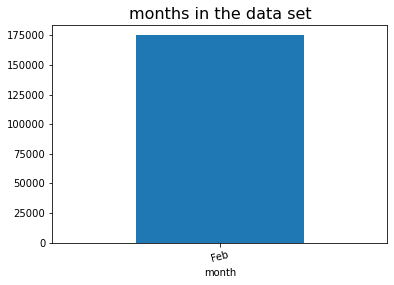

In [60]:
#check if there is any month beside febrauary
bike_df.groupby(['month']) ['month'].count().plot(kind='bar');
plt.xticks(rotation=15)
plt.title('months in the data set', fontsize=16);


<li><a href>ok , it only February</a></li>

### what about the age of the users??

In [61]:
bike_df.member_birth_year.max()

2001

#### use birth year to get Age

In [62]:
#get member age using birth_year
age = todays_date.year-bike_df.member_birth_year
print (age)

0         38
2         50
3         33
4         48
5         63
          ..
183407    26
183408    38
183409    32
183410    34
183411    33
Name: member_birth_year, Length: 174952, dtype: int64


## Univariate visualizations

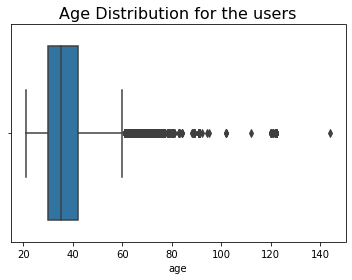

In [63]:
#plot age distribution
sb.boxplot(data=bike_df, x= age, color=sb.color_palette()[0])
plt.xlabel('age')
plt.title('Age Distribution for the users',fontsize=16);

so the younger user is 20 yars old and the older is 144 year ,wow 
the average age of the users is 37 years old.


### lets descover the users

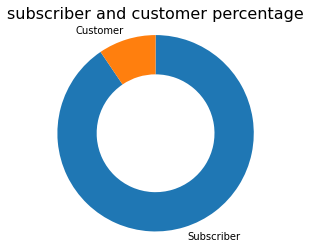

In [64]:
#the user type ratio
user_type= bike_df['user_type'].value_counts()

plt.pie(user_type, labels = user_type.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4})
plt.axis('square')

plt.title('subscriber and customer percentage', fontsize=16);

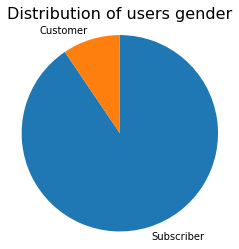

In [65]:
#the user_gender 
user_gender= bike_df['member_gender'].value_counts()

plt.pie(user_type, labels = user_type.index, startangle = 90,
        counterclock = False)
plt.axis('square')
plt.title('Distribution of users gender', fontsize=16);

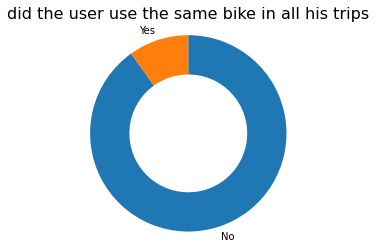

In [66]:
#check if the user use the same bike al the trip
user_type= bike_df['bike_share_for_all_trip'].value_counts()

plt.pie(user_type, labels = user_type.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4})
plt.axis('square')

plt.title('did the user use the same bike in all his trips', fontsize=16);

this  previous graphs depect that the main users are males, subscribers and the dont use the same bike for all thier trips.

### what about the duration time , is it normal distribution as we think? 

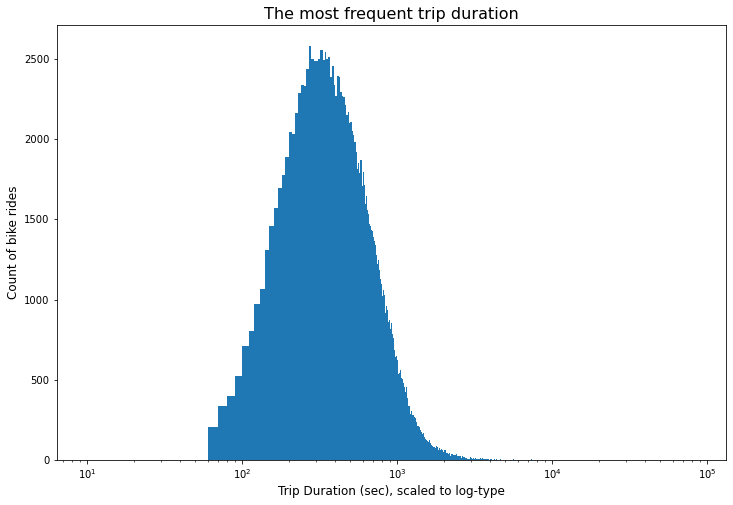

In [67]:

#duration graph colrelated to the trip count
plt.figure(figsize=(12,8))
bins = np.arange(0, bike_df['duration_sec'].max()+10, 10)
plt.hist(data = bike_df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xlabel('Trip Duration (sec), scaled to log-type',fontsize=12)
plt.ylabel('Count of bike rides', fontsize=12)
plt.title('The most frequent trip duration',fontsize=16)
plt.show();

 <li><a href> yes, it is , nice :) </a></li>


Interestingly, the bell shape of  of the duration distributions 

### let`s discover the most using for  days ,hours and stations 

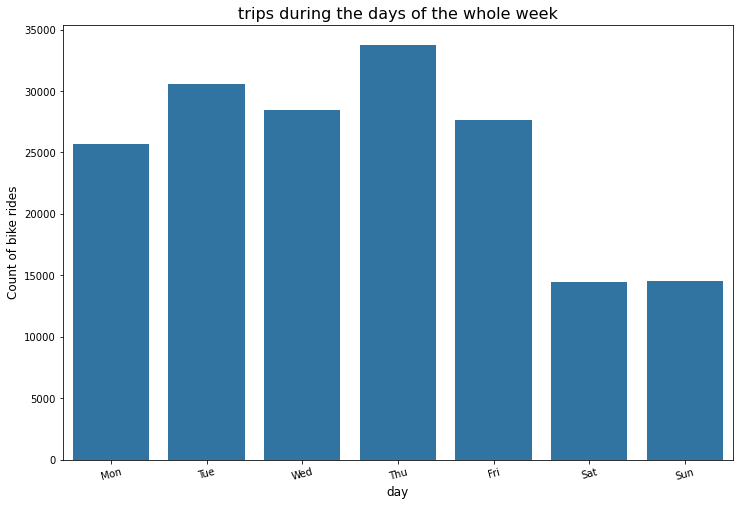

In [86]:
#count rides during the weak 
plt.figure(figsize=(12,8))
base_color = sb.color_palette()[0]
sb.countplot(data=bike_df, x='day',color=base_color, order=["Mon",'Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xticks(rotation=15)
plt.xlabel('day',fontsize=12)
plt.ylabel('Count of bike rides', fontsize=12)
plt.title('trips during the days of the whole week',fontsize=16)
plt.show();

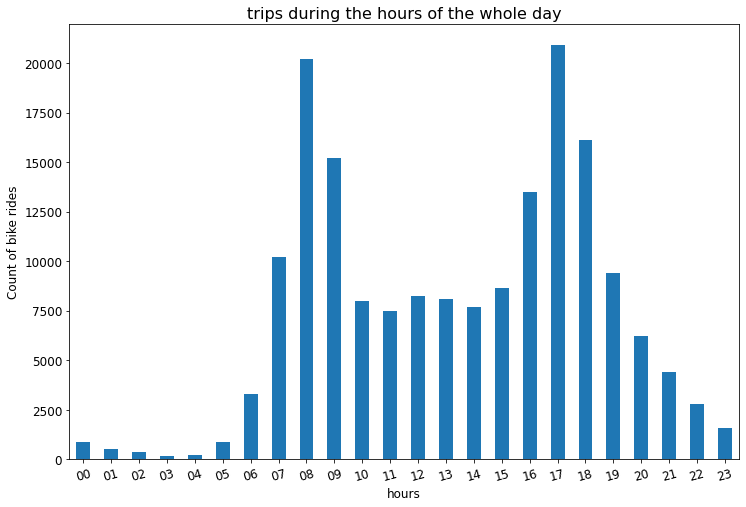

In [87]:
#count the rids during the day hours
plt.figure(figsize=(12,8))
bike_df.groupby(['hour']) ['hour'].count().plot(kind='bar',fontsize=12);
plt.xticks(rotation=15)

plt.xlabel('hours',fontsize=12)
plt.ylabel('Count of bike rides', fontsize=12)
plt.title('trips during the hours of the whole day',fontsize=16)
plt.show();

In [88]:
#the most important stations ,which will need extra care and mintainance
top_start_station=bike_df['start_station_name'].value_counts().index[:15]
print(top_start_station)


Index(['Market St at 10th St',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Berry St at 4th St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'Powell St BART Station (Market St at 4th St)',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'Howard St at Beale St', 'Steuart St at Market St',
       'Powell St BART Station (Market St at 5th St)',
       'The Embarcadero at Sansome St', 'Bancroft Way at Telegraph Ave',
       'Bancroft Way at College Ave', '2nd St at Townsend St',
       'Beale St at Harrison St'],
      dtype='object')


In [89]:
top_ten_start_station = bike_df.loc[bike_df['start_station_name'].isin(top_start_station)]
top_ten_start_station

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,day,hour,year,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984,Male,No,Feb,Thu,17,2019,38
14,395,2019-02-28 23:56:26.848,2019-03-01 00:03:01.947,243.0,Bancroft Way at College Ave,37.869360,-122.254337,252.0,Channing Way at Shattuck Ave,37.865847,...,4786,Subscriber,1988,Male,No,Feb,Thu,23,2019,34
23,367,2019-02-28 23:51:06.014,2019-02-28 23:57:13.312,243.0,Bancroft Way at College Ave,37.869360,-122.254337,269.0,Telegraph Ave at Carleton St,37.862320,...,1804,Subscriber,1997,Female,No,Feb,Thu,23,2019,25
26,385,2019-02-28 23:49:24.399,2019-02-28 23:55:50.284,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,6531,Customer,2000,Male,No,Feb,Thu,23,2019,22
38,1066,2019-02-28 23:31:16.139,2019-02-28 23:49:02.792,58.0,Market St at 10th St,37.776619,-122.417385,145.0,29th St at Church St,37.743684,...,5938,Subscriber,1992,Female,No,Feb,Thu,23,2019,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183387,598,2019-02-01 00:39:12.684,2019-02-01 00:49:10.791,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,245.0,Downtown Berkeley BART,37.870139,...,2055,Subscriber,1999,Male,Yes,Feb,Fri,00,2019,23
183390,232,2019-02-01 00:40:00.035,2019-02-01 00:43:52.880,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,266.0,Parker St at Fulton St,37.862464,...,3756,Subscriber,1999,Male,No,Feb,Fri,00,2019,23
183399,958,2019-02-01 00:12:24.247,2019-02-01 00:28:22.738,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,58.0,Market St at 10th St,37.776619,...,3392,Subscriber,1993,Male,No,Feb,Fri,00,2019,29
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,...,4832,Subscriber,1996,Male,No,Feb,Fri,00,2019,26


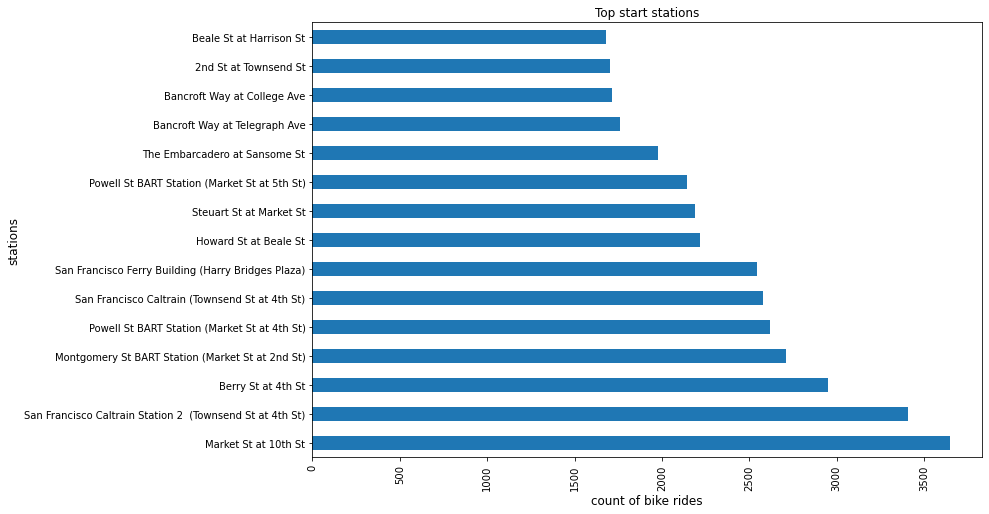

In [90]:
#check the most important start_stations
plt.figure(figsize=(12,8))
top_ten_start_station['start_station_name'].value_counts().plot(kind='barh');
plt.title('Top start stations', fontsize=12)
plt.xlabel('count of bike rides', fontsize=12)
plt.ylabel('stations', fontsize=12);
plt.xticks(rotation=90);

In [91]:
top_end_station=bike_df['end_station_name'].value_counts().index[:15]
print(top_end_station)

Index(['San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Market St at 10th St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'Powell St BART Station (Market St at 4th St)', 'Berry St at 4th St',
       'The Embarcadero at Sansome St', 'Steuart St at Market St',
       'Powell St BART Station (Market St at 5th St)', 'Howard St at Beale St',
       'Bancroft Way at Telegraph Ave', 'Beale St at Harrison St',
       'Civic Center/UN Plaza BART Station (Market St at McAllister St)',
       '2nd St at Townsend St'],
      dtype='object')


In [92]:
top_ten_end_station = bike_df.loc[bike_df['end_station_name'].isin(top_end_station)]
top_ten_end_station

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,day,hour,year,age
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972,Male,No,Feb,Thu,12,2019,50
26,385,2019-02-28 23:49:24.399,2019-02-28 23:55:50.284,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,6531,Customer,2000,Male,No,Feb,Thu,23,2019,22
31,223,2019-02-28 23:49:27.027,2019-02-28 23:53:10.535,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,50.0,2nd St at Townsend St,37.780526,...,6267,Customer,1993,Male,No,Feb,Thu,23,2019,29
45,717,2019-02-28 23:33:21.095,2019-02-28 23:45:18.510,9.0,Broadway at Battery St,37.798572,-122.400869,58.0,Market St at 10th St,37.776619,...,6581,Subscriber,1980,Male,No,Feb,Thu,23,2019,42
66,457,2019-02-28 23:23:32.035,2019-02-28 23:31:09.406,345.0,Hubbell St at 16th St,37.766483,-122.398279,81.0,Berry St at 4th St,37.775880,...,6132,Subscriber,1982,Female,No,Feb,Thu,23,2019,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183373,954,2019-02-01 00:54:08.960,2019-02-01 01:10:03.869,11.0,Davis St at Jackson St,37.797280,-122.398436,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,...,545,Subscriber,1974,Male,Yes,Feb,Fri,00,2019,48
183378,659,2019-02-01 00:53:36.143,2019-02-01 01:04:35.371,47.0,4th St at Harrison St,37.780955,-122.399749,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,...,4960,Subscriber,1985,Other,No,Feb,Fri,00,2019,37
183388,490,2019-02-01 00:39:53.112,2019-02-01 00:48:03.338,61.0,Howard St at 8th St,37.776513,-122.411306,81.0,Berry St at 4th St,37.775880,...,5411,Subscriber,1927,Male,No,Feb,Fri,00,2019,95
183399,958,2019-02-01 00:12:24.247,2019-02-01 00:28:22.738,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,58.0,Market St at 10th St,37.776619,...,3392,Subscriber,1993,Male,No,Feb,Fri,00,2019,29


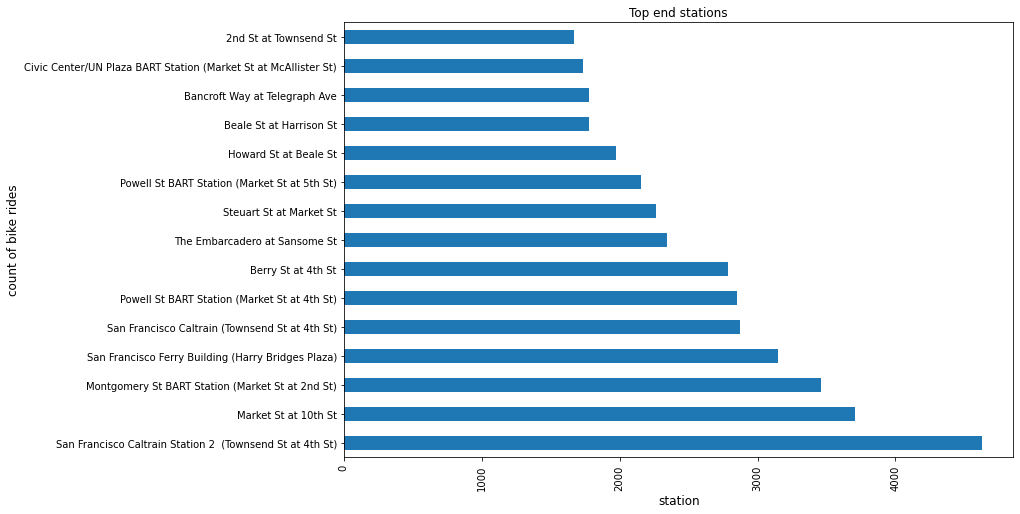

In [93]:
#check the most important end stations
plt.figure(figsize=(12,8))
top_ten_end_station['end_station_name'].value_counts().plot(kind='barh')
plt.title('Top end stations', fontsize=12)
plt.xlabel('station', fontsize=12)
plt.ylabel('count of bike rides', fontsize=12);
plt.xticks(rotation=90);

 <li><a href> it is thursday the most crowded day in the normal rush hours , the most used station is san francisco cattrain station 2& market st 10 , it is the most importat station to care with
) </a></li>

### Bivariate visualizations


### Now let use the duration with user type & gender

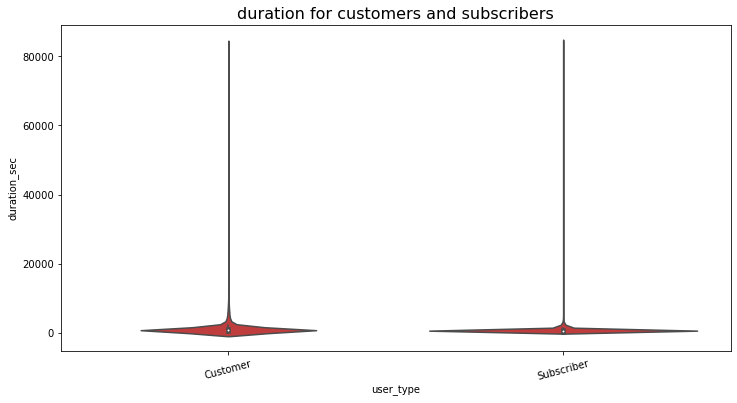

In [94]:
#duration in sec in correlation with user type 
plt.figure(figsize=(12,6))
base_color = sb.color_palette()[3]
sb.violinplot(data=bike_df, y='duration_sec', x='user_type', color=base_color, innner=None)
plt.title('duration for customers and subscribers', fontsize=16)
plt.xticks(rotation=15);

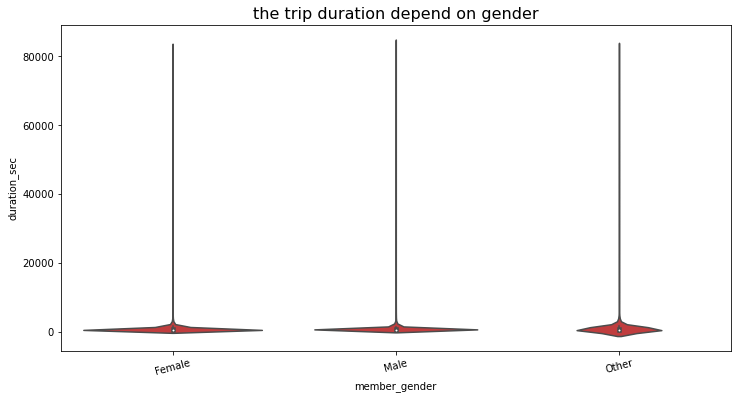

In [95]:
#duration per sec in correlation with member gender
plt.figure(figsize=(12,6))
base_color = sb.color_palette()[3]
sb.violinplot(data=bike_df, y='duration_sec', x='member_gender', color=base_color, innner=None)
plt.title('the trip duration depend on gender', fontsize=16)
plt.xticks(rotation=15);

<li><a href> the all users almost use the same average duration, regardless the type or gender
) </a></li>

#### Multivariate visualizations:

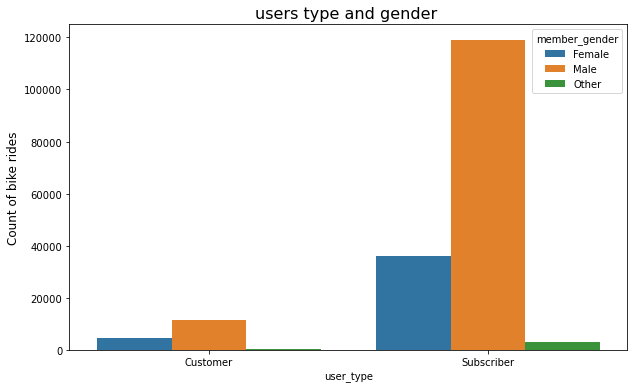

In [96]:
#user type distriburion and corelation with gender

plt.figure(figsize=(10,6))
sb.countplot(data=bike_df, x='user_type', hue='member_gender');
plt.ylabel('Count of bike rides', fontsize=12)
plt.title('users type and gender ',fontsize=16)
plt.show();

 <li><a href> the Male subscribers is the most commen users
) </a></li>


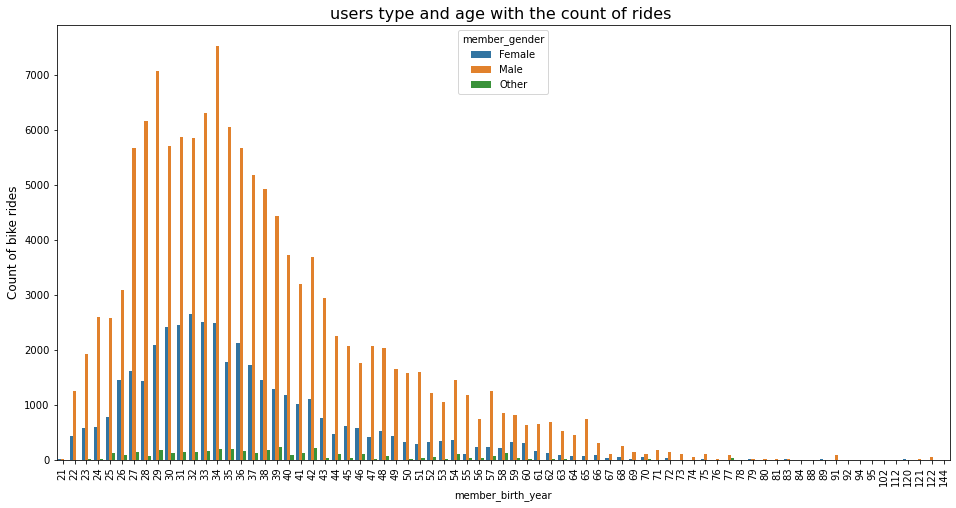

In [97]:
#age distribution with count of rides, with gender type
plt.figure(figsize=(16,8))
sb.countplot(data=bike_df, x=age, hue='member_gender')
plt.xticks(rotation=90);
plt.ylabel('Count of bike rides',fontsize=12)
plt.title('users type and age with the count of rides ',fontsize=16)
plt.show();

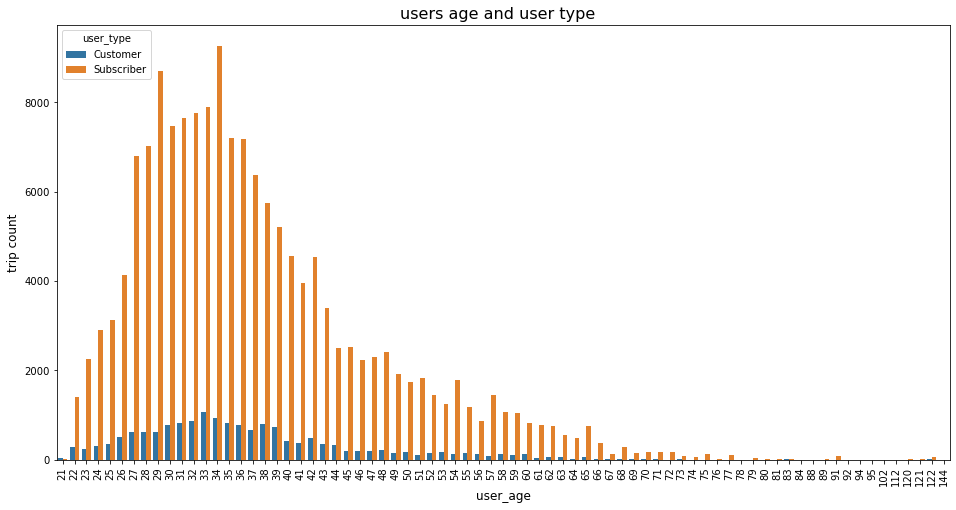

In [98]:
#the correlation between age and the trip duration ,age
plt.figure(figsize=(16,8))
sb.countplot(data=bike_df, x=age, hue='user_type')
plt.xticks(rotation=90);
plt.ylabel('trip count',fontsize=12)
plt.xlabel('user_age', fontsize=12)
plt.title('users age and user type  ',fontsize=16)
plt.show();


C:\Users\m\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 864x432 with 0 Axes>

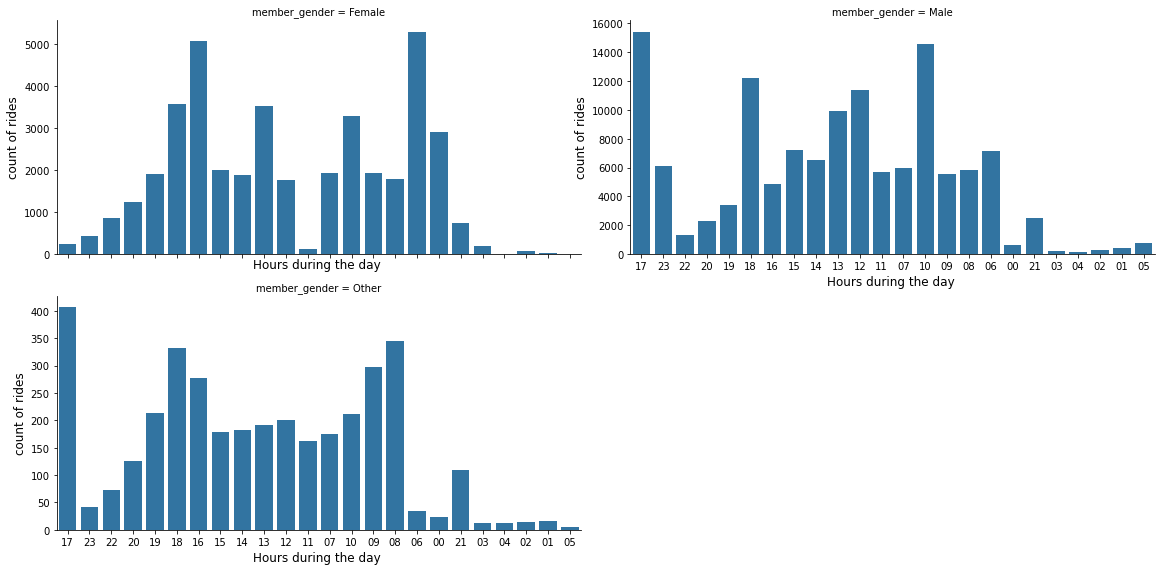

In [99]:

# distribution of count of rids  during day hours for each type of users gender

plt.figure(figsize=(12,6))
user= sb.FacetGrid(data=bike_df,col=('member_gender'), col_wrap = 2, height = 4, aspect=2, sharey=False)
user.map(sb.countplot, 'hour')
for i in range(3):
    user.axes[i].set_xlabel('Hours during the day ',fontsize=12)
    user.axes[i].set_ylabel('count of rides',fontsize=12);

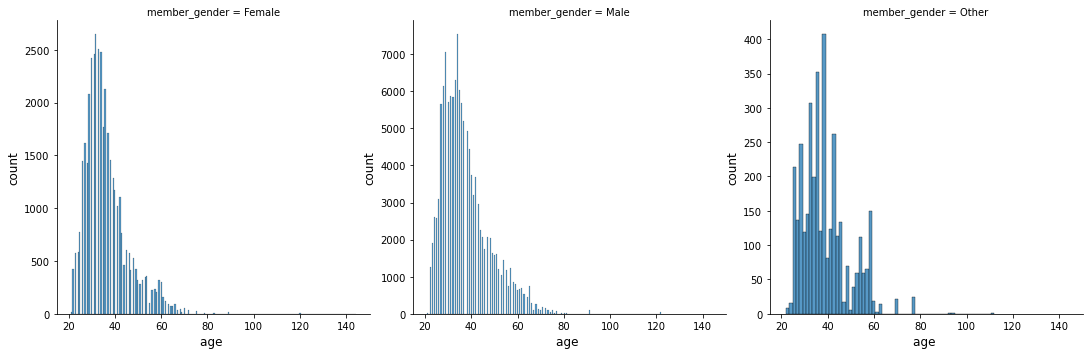

In [100]:
#count of rides in relation with member _gender And age distriburion
user= sb.FacetGrid(data=bike_df,col='member_gender', col_wrap = 3, height = 5, aspect=1, sharey=False)
user.map(sb.histplot, 'age')
for i in range(3):
    user.axes[i].set_xlabel('age ' ,fontsize=12)
    user.axes[i].set_ylabel('count',fontsize=12);

C:\Users\m\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 864x432 with 0 Axes>

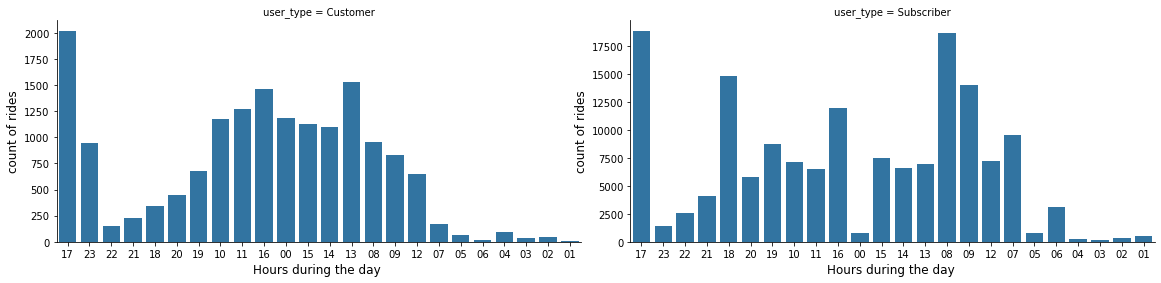

In [101]:

# distribution of count of rids  during day hours for each type of user_type

plt.figure(figsize=(12,6))
user= sb.FacetGrid(data=bike_df,col=('user_type'), col_wrap = 2, height = 4, aspect=2, sharey=False)
user.map(sb.countplot, 'hour')
for i in range(2):
    user.axes[i].set_xlabel('Hours during the day ',fontsize=12)
    user.axes[i].set_ylabel('count of rides',fontsize=12);

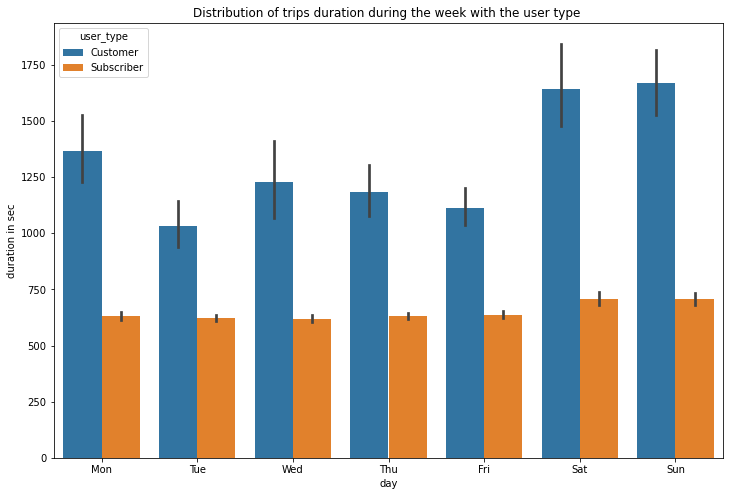

In [105]:
# trip duration in the whole week wwwith user type
plt.figure(figsize=(12,8))
base_color = sb.color_palette()[0]

sb.barplot(data=bike_df, x='day', order=["Mon",'Tue','Wed','Thu','Fri','Sat','Sun'], y='duration_sec', hue='user_type')
plt.xlabel('day')
plt.ylabel('duration in sec')
plt.title("Distribution of trips duration during the week with the user type ", fontsize=12);

this affect also on the gender type, depicting it is the higher everyday, so we need to gather more information about the customers.

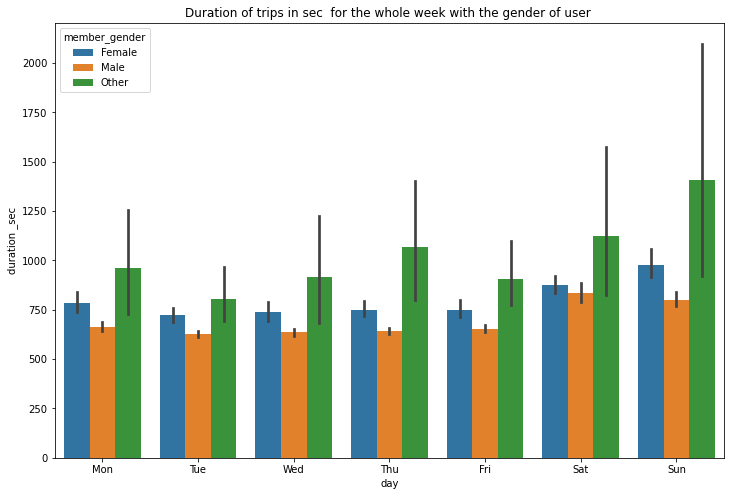

In [108]:
#duration in sec in the hole week with user gender
plt.figure(figsize=(12,8))
base_color = sb.color_palette()[3]
sb.barplot(data=bike_df, x='day',order=["Mon",'Tue','Wed','Thu','Fri','Sat','Sun'], y='duration_sec', hue='member_gender')
plt.xlabel('day')
plt.ylabel('duration _sec')
plt.title("Duration of trips in sec  for the whole week with the gender of user ", fontsize=12);

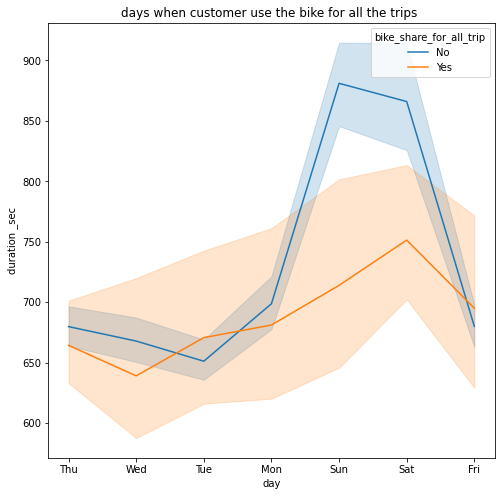

In [109]:
# plot for the customers who use the bike for all the trips in aspacific days 
plt.figure(figsize=(8,8))
base_color = sb.color_palette()[0]
sb.lineplot(data=bike_df, x='day', y='duration_sec', hue='bike_share_for_all_trip')
plt.xlabel('day')
plt.ylabel('duration _sec')
plt.title("days when customer use the bike for all the trips ", fontsize=12);


usually in the week end the users didnt share thier bikes for all the trip, but they do in the some time during the rest of the week.